In [1]:
%matplotlib notebook

In [2]:
import hyperspy.api as hs

In [3]:
import atomap.api as am

In [4]:
s = hs.load("simulated_nanoparticle.tif")
s.change_dtype('float64')

In [5]:
s_separation = am.get_feature_separation(s, separation_range=(2,7), threshold_rel=0.03)

100%|██████████| 257/257 [00:00<00:00, 5179.62it/s]


<IPython.core.display.Javascript object>


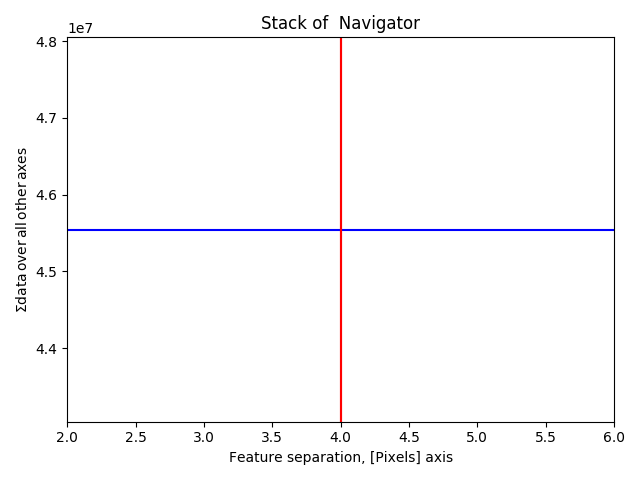

<IPython.core.display.Javascript object>


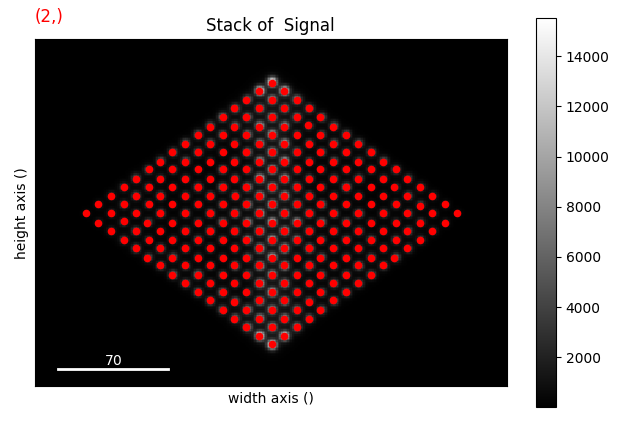

In [6]:
s_separation.plot()

In [7]:
atom_positions = am.get_atom_positions(s, 4, threshold_rel=0.03)

In [8]:
sublattice = am.Sublattice(atom_position_list=atom_positions, image=s.data)

<IPython.core.display.Javascript object>


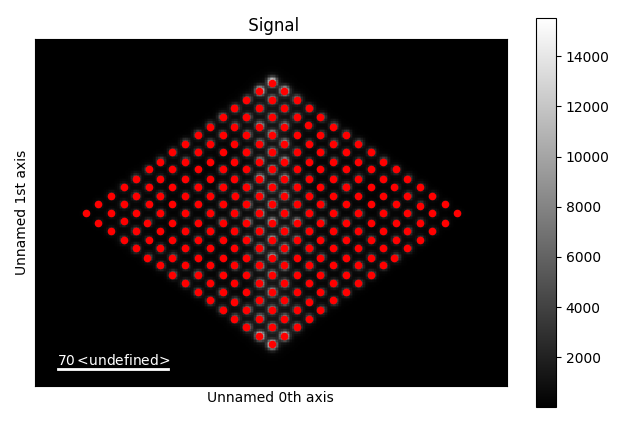

In [9]:
sublattice.get_atom_list_on_image().plot()

In [10]:
sublattice.construct_zone_axes()

In [11]:
sublattice.refine_atom_positions_using_center_of_mass(sublattice.image)

Center of mass: 100%|██████████| 256/256 [00:00<00:00, 1011.21it/s]


In [12]:
sublattice.refine_atom_positions_using_2d_gaussian(sublattice.image)

Gaussian fitting: 100%|██████████| 256/256 [00:05<00:00, 47.71it/s]


<IPython.core.display.Javascript object>


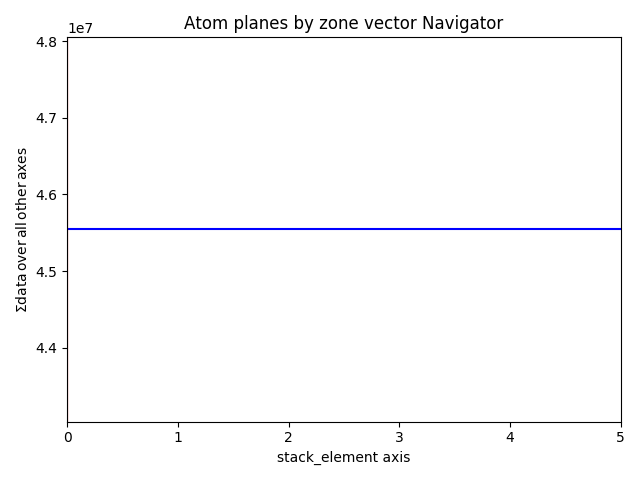

<IPython.core.display.Javascript object>


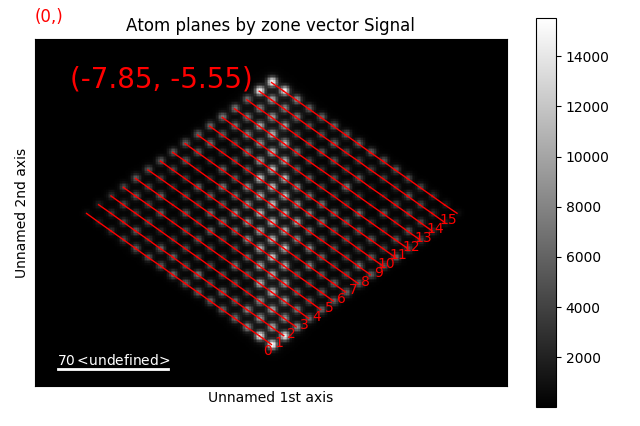

In [13]:
sublattice.get_all_atom_planes_by_zone_vector().plot()

In [14]:
s_monolayer = sublattice.get_monolayer_distance_map()

<IPython.core.display.Javascript object>


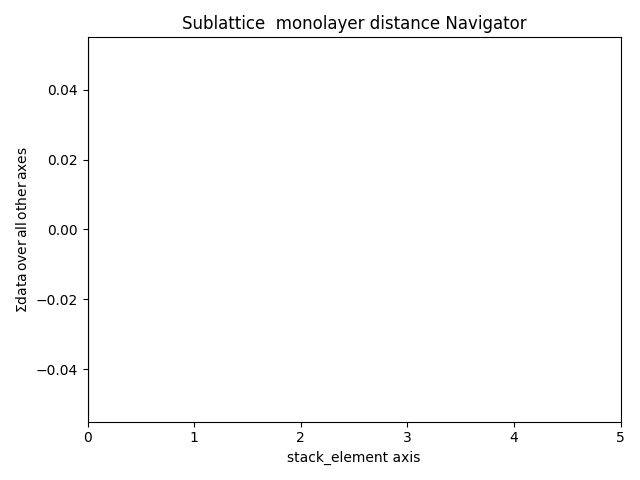

<IPython.core.display.Javascript object>


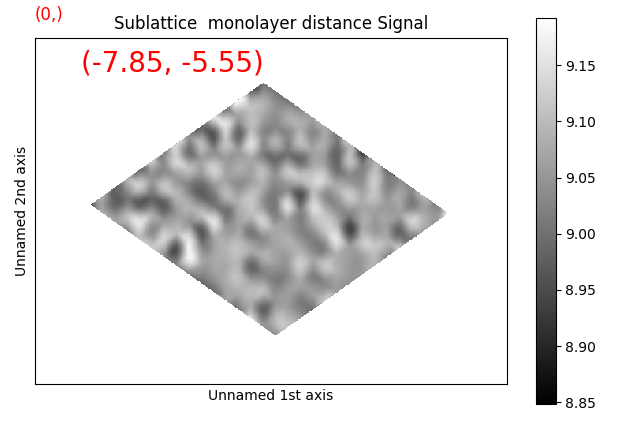

In [15]:
s_monolayer.plot()

In [16]:
atom_lattice = am.Atom_Lattice(sublattice_list=[sublattice], image=s.data, name="simulated nanoparticle")

In [17]:
atom_lattice.save("nanoparticle_atom_lattice.hdf5", overwrite=True)